In [1]:
# Initial imports.

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot 
from scipy import stats
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedRandomForestClassifier

### Patient Vitals (First Hour in ICU)

In [2]:
# Loading data

file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Machine_Learning/Resources/vitals_hour_patient.csv")
df_vitals_h1 = pd.read_csv(file_path)
df_vitals_h1.head()

,patient_id,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,hospital_death
0,25312,68,63,119,108,86,85,26,18,100,74,131,115,0
1,59342,61,48,114,100,85,57,31,28,95,70,95,71,0
2,50777,88,58,96,78,91,83,20,16,98,91,148,124,0
3,46918,62,44,100,96,92,71,12,11,100,99,136,106,0
4,74489,89,89,83,83,111,111,12,12,97,97,143,143,0


In [3]:
# Drop patient_id column

df_vitals_h1=df_vitals_h1.drop(columns=['patient_id'])


In [4]:
# Create our features

X = df_vitals_h1.drop('hospital_death', axis=1)


X.head()

,h1_diasbp_max,h1_diasbp_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min
0,68,63,119,108,86,85,26,18,100,74,131,115
1,61,48,114,100,85,57,31,28,95,70,95,71
2,88,58,96,78,91,83,20,16,98,91,148,124
3,62,44,100,96,92,71,12,11,100,99,136,106
4,89,89,83,83,111,111,12,12,97,97,143,143


In [5]:
X.describe

<bound method NDFrame.describe of        h1_diasbp_max  h1_diasbp_min  h1_heartrate_max  h1_heartrate_min  \
0                 68             63               119               108   
1                 61             48               114               100   
2                 88             58                96                78   
3                 62             44               100                96   
4                 89             89                83                83   
...              ...            ...               ...               ...   
73257             70             70               100                93   
73258            102             96                59                55   
73259             55             44               111                96   
73260             64             56                89                83   
73261             40             36                83                75   

       h1_mbp_max  h1_mbp_min  h1_resprate_max  h1_resprate_min  

In [6]:
#Create our target 

y = df_vitals_h1['hospital_death']

y.value_counts()

0    67400
1     5862
Name: hospital_death, dtype: int64

In [7]:
# Split data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [8]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50550, 1: 4396})
Counter({0: 16850, 1: 1466})


In [9]:
# Instantiate RBC

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit

brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [10]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
RandomForest_accuracy_vitals_h1 = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy_vitals_h1

0.661057845284409

In [11]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,11324,5526
Actual Death,513,953


In [12]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.67      0.65      0.79      0.66      0.44     16850
          1       0.15      0.65      0.67      0.24      0.66      0.44      1466

avg / total       0.89      0.67      0.65      0.75      0.66      0.44     18316



In [13]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

h1_sysbp_min: (0.11026637089007352)
h1_heartrate_max: (0.0931061704133453)
h1_mbp_min: (0.09001667287646543)
h1_diasbp_min: (0.08970825533925379)
h1_heartrate_min: (0.08833249557298828)
h1_sysbp_max: (0.08821061879218861)
h1_resprate_max: (0.08444542754602728)
h1_resprate_min: (0.08262180213603429)
h1_diasbp_max: (0.08054526020911164)
h1_mbp_max: (0.07868096799990344)
h1_spo2_min: (0.06986375198990209)
h1_spo2_max: (0.04420220623470642)


Text(0.5, 1.0, 'Feature Importance Hour 1 Vitals')

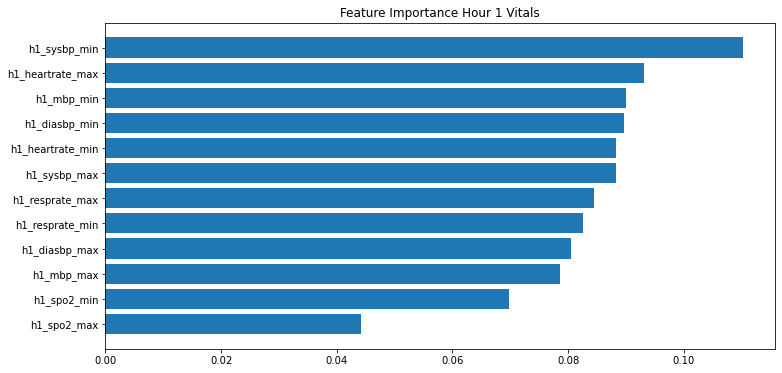

In [14]:
# Plot Features 

feature_importance = brfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fit = plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance Hour 1 Vitals')

### Patient Vitals (First Day in ICU)

In [15]:
file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Machine_Learning/Resources/vitals_day_patient.csv")
df_vitals_d1 = pd.read_csv(file_path)
df_vitals_d1.head()

,patient_id,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,...,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,hospital_death
0,25312,68,37,68,37,119,72,89,46,89,...,10,100,74,131,73,131,73.0,39.9,37.2,0
1,59342,95,31,95,31,118,72,120,38,120,...,12,100,70,159,67,159,67.0,36.3,35.1,0
2,50777,88,48,88,48,96,68,102,68,102,...,8,98,91,148,105,148,105.0,37.0,36.7,0
3,46918,48,42,48,42,116,92,84,84,84,...,7,100,95,158,84,158,84.0,38.0,34.8,0
4,74489,100,61,100,61,113,83,127,80,127,...,10,97,91,173,107,173,107.0,36.8,36.6,0


In [16]:
# Drop patient_id column

df_vitals_d1=df_vitals_d1.drop(columns=['patient_id'])

In [17]:
# Create our features

X = df_vitals_d1.drop('hospital_death', axis=1)


X.head()

,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min
0,68,37,68,37,119,72,89,46,89,46,34,10,100,74,131,73,131,73.0,39.9,37.2
1,95,31,95,31,118,72,120,38,120,38,32,12,100,70,159,67,159,67.0,36.3,35.1
2,88,48,88,48,96,68,102,68,102,68,21,8,98,91,148,105,148,105.0,37.0,36.7
3,48,42,48,42,116,92,84,84,84,84,23,7,100,95,158,84,158,84.0,38.0,34.8
4,100,61,100,61,113,83,127,80,127,80,32,10,97,91,173,107,173,107.0,36.8,36.6


In [18]:
X.describe

<bound method NDFrame.describe of        d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
0                 68             37                         68   
1                 95             31                         95   
2                 88             48                         88   
3                 48             42                         48   
4                100             61                        100   
...              ...            ...                        ...   
73257             83             57                         83   
73258            102             54                        102   
73259            104             44                        104   
73260             73             40                         73   
73261             47             32                         47   

       d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  \
0                             37               119                72   
1                            

In [19]:
#Create our target 

y = df_vitals_d1['hospital_death']

y.value_counts()

0    67400
1     5862
Name: hospital_death, dtype: int64

In [20]:
# Split data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [21]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50550, 1: 4396})
Counter({0: 16850, 1: 1466})


In [22]:
# Instantiate RBC

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit

brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [23]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
RandomForest_accuracy_vitals_d1 = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy_vitals_d1

0.7331600147355892

In [24]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,12524,4326
Actual Death,406,1060


In [25]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.74      0.72      0.84      0.73      0.54     16850
          1       0.20      0.72      0.74      0.31      0.73      0.54      1466

avg / total       0.91      0.74      0.72      0.80      0.73      0.54     18316



In [26]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

d1_temp_min: (0.08221067493229833)
d1_sysbp_min: (0.07040176372708373)
d1_sysbp_noninvasive_min: (0.07028509772493469)
d1_spo2_min: (0.0694960027802098)
d1_heartrate_max: (0.06824034396987907)
d1_temp_max: (0.06296546476599996)
d1_resprate_max: (0.058963896668094866)
d1_heartrate_min: (0.05448626333040839)
d1_resprate_min: (0.04873708207569174)
d1_mbp_noninvasive_min: (0.048540798201939975)
d1_mbp_min: (0.04630810352592036)
d1_diasbp_noninvasive_min: (0.04123435654808553)
d1_sysbp_max: (0.04085902257636915)
d1_sysbp_noninvasive_max: (0.040599114584535086)
d1_diasbp_noninvasive_max: (0.03737905605516293)
d1_diasbp_max: (0.036995441086740403)
d1_diasbp_min: (0.03693767184455811)
d1_mbp_noninvasive_max: (0.03610772495052992)
d1_mbp_max: (0.035388828721079416)
d1_spo2_max: (0.013863291930478703)


Text(0.5, 1.0, 'Feature Importance Day 1 Vitals')

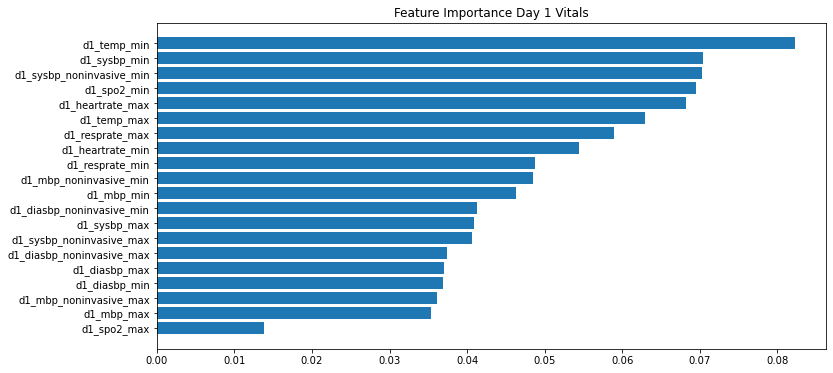

In [27]:
# Plot Features 

feature_importance = brfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fit = plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance Day 1 Vitals')

### All Patient Vitals Taken in ICU

In [28]:
file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Machine_Learning/Resources/vitals_all_patient.csv")
df_vitals_all = pd.read_csv(file_path)
df_vitals_all.head()

,patient_id,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,...,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,hospital_death
0,25312,68,37,68,37,119,72,89,46,89,...,108,86,85,26,18,100,74,131,115,0
1,59342,95,31,95,31,118,72,120,38,120,...,100,85,57,31,28,95,70,95,71,0
2,50777,88,48,88,48,96,68,102,68,102,...,78,91,83,20,16,98,91,148,124,0
3,46918,48,42,48,42,116,92,84,84,84,...,96,92,71,12,11,100,99,136,106,0
4,74489,100,61,100,61,113,83,127,80,127,...,83,111,111,12,12,97,97,143,143,0


In [29]:
# Drop patient_id column

df_vitals_all=df_vitals_all.drop(columns=['patient_id'])

In [30]:
# Create our features

X = df_vitals_all.drop('hospital_death', axis=1)


X.head()

,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,...,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min
0,68,37,68,37,119,72,89,46,89,46,...,119,108,86,85,26,18,100,74,131,115
1,95,31,95,31,118,72,120,38,120,38,...,114,100,85,57,31,28,95,70,95,71
2,88,48,88,48,96,68,102,68,102,68,...,96,78,91,83,20,16,98,91,148,124
3,48,42,48,42,116,92,84,84,84,84,...,100,96,92,71,12,11,100,99,136,106
4,100,61,100,61,113,83,127,80,127,80,...,83,83,111,111,12,12,97,97,143,143


In [31]:
X.describe


<bound method NDFrame.describe of        d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
0                 68             37                         68   
1                 95             31                         95   
2                 88             48                         88   
3                 48             42                         48   
4                100             61                        100   
...              ...            ...                        ...   
73257             83             57                         83   
73258            102             54                        102   
73259            104             44                        104   
73260             73             40                         73   
73261             47             32                         47   

       d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  \
0                             37               119                72   
1                            

In [32]:
#Create our target 

y = df_vitals_all['hospital_death']

y.value_counts()

0    67400
1     5862
Name: hospital_death, dtype: int64

In [33]:
# Split data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [34]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50550, 1: 4396})
Counter({0: 16850, 1: 1466})


In [35]:
# Instantiate RBC

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit

brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [36]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
RandomForest_accuracy_vitals_all = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy_vitals_all

0.7345682350893243

In [37]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,12491,4359
Actual Death,399,1067


In [38]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.74      0.73      0.84      0.73      0.54     16850
          1       0.20      0.73      0.74      0.31      0.73      0.54      1466

avg / total       0.91      0.74      0.73      0.80      0.73      0.54     18316



In [39]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

d1_temp_min: (0.0652417103814067)
d1_sysbp_noninvasive_min: (0.05108410297502007)
d1_sysbp_min: (0.04990123851432775)
d1_spo2_min: (0.04976788834748856)
d1_heartrate_max: (0.046968572895228565)
d1_temp_max: (0.04449118847957833)
d1_resprate_max: (0.037489261283141284)
d1_mbp_min: (0.0360857168332096)
h1_resprate_min: (0.034644554321458784)
d1_mbp_noninvasive_min: (0.034532627631710264)
d1_heartrate_min: (0.03408362538696804)
d1_diasbp_min: (0.030271828626371514)
h1_sysbp_min: (0.02984022762523764)
h1_resprate_max: (0.02935671171130509)
h1_heartrate_max: (0.028918007297405717)
d1_diasbp_noninvasive_min: (0.02855475530199253)
d1_resprate_min: (0.028200476160967533)
h1_heartrate_min: (0.028134448250530627)
h1_mbp_min: (0.028052206014050906)
h1_sysbp_max: (0.02589485481724943)
h1_diasbp_min: (0.0257381934797454)
d1_sysbp_max: (0.02496008687780345)
d1_sysbp_noninvasive_max: (0.0246898028993287)
h1_diasbp_max: (0.024580150292323407)
d1_diasbp_max: (0.023803182453026758)
h1_mbp_max: (0.023802

Text(0.5, 1.0, 'Feature Importance All Vitals')

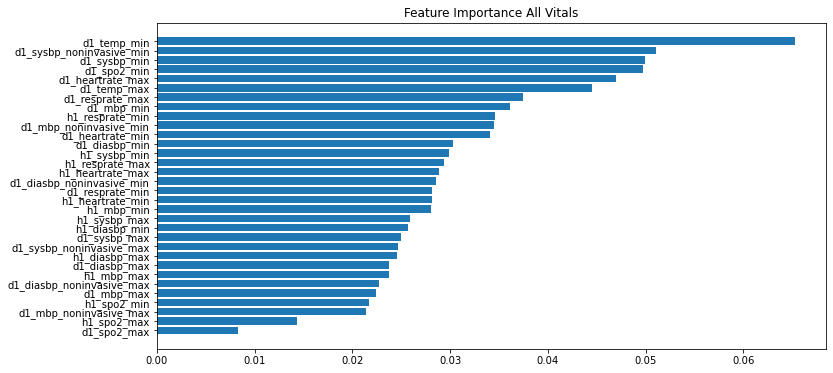

In [40]:
# Plot Features 

feature_importance = brfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fit = plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance All Vitals')

### Patient Demographics

In [41]:
file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Machine_Learning/Resources/demographic_patient.csv")
df_vitals_all = pd.read_csv(file_path)
df_vitals_all.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status
0,66154,25312,118,0,68,22.73,0,2,1,1,92,0,2,0.541667,0
1,114252,59342,81,0,77,27.42,0,2,0,1,90,0,5,0.927778,0
2,119783,50777,118,0,25,31.95,0,2,0,0,93,0,5,0.000694,0
3,79267,46918,118,0,81,22.64,1,2,0,2,92,0,2,0.000694,0
4,33181,74489,83,0,67,27.56,0,2,1,0,95,0,5,0.000694,0


In [44]:
# Drop unique identifier columns

df_vitals_all=df_vitals_all.drop(columns=['patient_id', 'encounter_id', 'hospital_id'])

In [45]:
# Create our features

X = df_vitals_all.drop('hospital_death', axis=1)


X.head()

,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status
0,68,22.73,0,2,1,1,92,0,2,0.541667,0
1,77,27.42,0,2,0,1,90,0,5,0.927778,0
2,25,31.95,0,2,0,0,93,0,5,0.000694,0
3,81,22.64,1,2,0,2,92,0,2,0.000694,0
4,67,27.56,0,2,1,0,95,0,5,0.000694,0


In [46]:
X.describe

<bound method NDFrame.describe of        age        bmi  elective_surgery  ethnicity  gender  icu_admit_source  \
0       68  22.730000                 0          2       1                 1   
1       77  27.420000                 0          2       0                 1   
2       25  31.950000                 0          2       0                 0   
3       81  22.640000                 1          2       0                 2   
4       67  27.560000                 0          2       1                 0   
...    ...        ...               ...        ...     ...               ...   
73257   47  51.439842                 1          2       1                 2   
73258   54  19.770448                 0          4       1                 0   
73259   75  23.060250                 0          2       1                 1   
73260   56  47.179671                 0          2       0                 1   
73261   82  22.031250                 1          2       0                 2   

     

In [47]:
#Create our target 

y = df_vitals_all['hospital_death']

y.value_counts()

0    67400
1     5862
Name: hospital_death, dtype: int64

In [48]:
# Split data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [49]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50550, 1: 4396})
Counter({0: 16850, 1: 1466})


In [50]:
# Instantiate RBC

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit

brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [51]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
RandomForest_accuracy_demographics = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy_demographics

0.6310102379959599

In [52]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,10116,6734
Actual Death,496,970


In [53]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.60      0.66      0.74      0.63      0.39     16850
          1       0.13      0.66      0.60      0.21      0.63      0.40      1466

avg / total       0.89      0.61      0.66      0.69      0.63      0.40     18316



In [54]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

bmi: (0.21970470760838592)
pre_icu_los_days: (0.21308520171211348)
age: (0.19094321506302636)
icu_id: (0.17352912562655784)
icu_type: (0.05982866454236647)
ethnicity: (0.03940457127970916)
icu_admit_source: (0.03566754031588353)
elective_surgery: (0.031076888830657595)
gender: (0.02579646621600176)
icu_stay_type: (0.01096361880529792)
readmission_status: (0.0)


Text(0.5, 1.0, 'Feature Importance Patient Demographics')

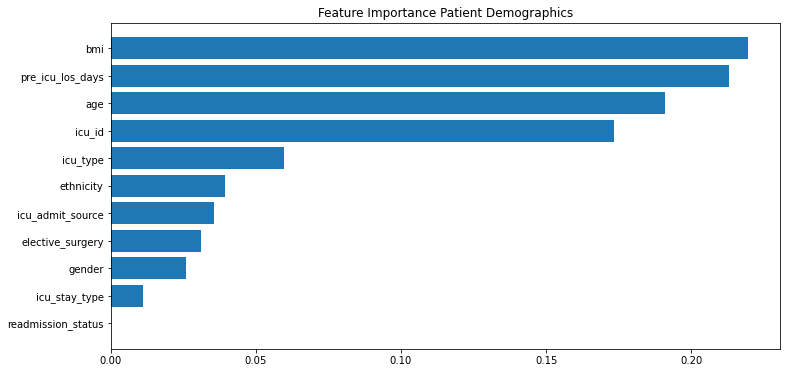

In [55]:
# Plot Features 

feature_importance = brfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fit = plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance Patient Demographics')

### Patient Database

In [56]:
file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Machine_Learning/Resources/database_patient.csv")
df_vitals_all = pd.read_csv(file_path)
df_vitals_all.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68,22.73,0,2,1,1,...,0,0,1,0,0,0,0,0,9,0
1,114252,59342,81,0,77,27.42,0,2,0,1,...,0,0,1,0,0,0,0,0,8,6
2,119783,50777,118,0,25,31.95,0,2,0,0,...,0,0,0,0,0,0,0,0,5,3
3,79267,46918,118,0,81,22.64,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0
4,33181,74489,83,0,67,27.56,0,2,1,0,...,0,0,1,0,0,0,0,0,7,4


In [57]:
# Drop unique identifier columns

df_vitals_all=df_vitals_all.drop(columns=['patient_id', 'encounter_id', 'hospital_id'])

In [58]:
# Create our features

X = df_vitals_all.drop('hospital_death', axis=1)


X.head()

,age,bmi,elective_surgery,ethnicity,gender,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68,22.73,0,2,1,1,92,0,2,0.541667,...,0,0,1,0,0,0,0,0,9,0
1,77,27.42,0,2,0,1,90,0,5,0.927778,...,0,0,1,0,0,0,0,0,8,6
2,25,31.95,0,2,0,0,93,0,5,0.000694,...,0,0,0,0,0,0,0,0,5,3
3,81,22.64,1,2,0,2,92,0,2,0.000694,...,0,0,0,0,0,0,0,0,0,0
4,67,27.56,0,2,1,0,95,0,5,0.000694,...,0,0,1,0,0,0,0,0,7,4


In [59]:
X.describe

<bound method NDFrame.describe of        age        bmi  elective_surgery  ethnicity  gender  icu_admit_source  \
0       68  22.730000                 0          2       1                 1   
1       77  27.420000                 0          2       0                 1   
2       25  31.950000                 0          2       0                 0   
3       81  22.640000                 1          2       0                 2   
4       67  27.560000                 0          2       1                 0   
...    ...        ...               ...        ...     ...               ...   
73257   47  51.439842                 1          2       1                 2   
73258   54  19.770448                 0          4       1                 0   
73259   75  23.060250                 0          2       1                 1   
73260   56  47.179671                 0          2       0                 1   
73261   82  22.031250                 1          2       0                 2   

     

In [60]:
#Create our target 

y = df_vitals_all['hospital_death']

y.value_counts()

0    67400
1     5862
Name: hospital_death, dtype: int64

In [61]:
# Split data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [62]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50550, 1: 4396})
Counter({0: 16850, 1: 1466})


In [63]:
# Instantiate RBC

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit

brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [64]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
RandomForest_accuracy_database = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy_database

0.7948431105047749

In [65]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,13143,3707
Actual Death,279,1187


In [66]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.78      0.81      0.87      0.79      0.63     16850
          1       0.24      0.81      0.78      0.37      0.79      0.63      1466

avg / total       0.92      0.78      0.81      0.83      0.79      0.63     18316



In [67]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

gcs_motor_apache: (0.04246366547483487)
d1_sysbp_noninvasive_min: (0.04154108270544474)
ventilated_apache: (0.040896445117560506)
age: (0.03676679947881998)
d1_spo2_min: (0.032432336017719006)
gcs_verbal_apache: (0.03231949176756836)
gcs_eyes_apache: (0.03173552319263507)
d1_sysbp_min: (0.027155878574796333)
d1_heartrate_max: (0.026619613367424327)
d1_mbp_min: (0.026040018147565326)
d1_temp_min: (0.025634490138027637)
d1_resprate_max: (0.025398884658886064)
d1_mbp_noninvasive_min: (0.0236054981724934)
pre_icu_los_days: (0.023378723105511055)
temp_apache: (0.02321525824696883)
heart_rate_apache: (0.021390877761695633)
d1_heartrate_min: (0.021105369170806288)
bmi: (0.02102268842397846)
d1_diasbp_noninvasive_min: (0.020118921919250056)
h1_resprate_min: (0.019927208374629725)
h1_resprate_max: (0.019459290118891304)
d1_temp_max: (0.01829776881791225)
icu_id: (0.018182778850766298)
h1_sysbp_min: (0.017864664032378085)
map_apache: (0.017854158509995572)
d1_diasbp_min: (0.017297843151408254)
h

Text(0.5, 1.0, 'Feature Importance Patient Database')

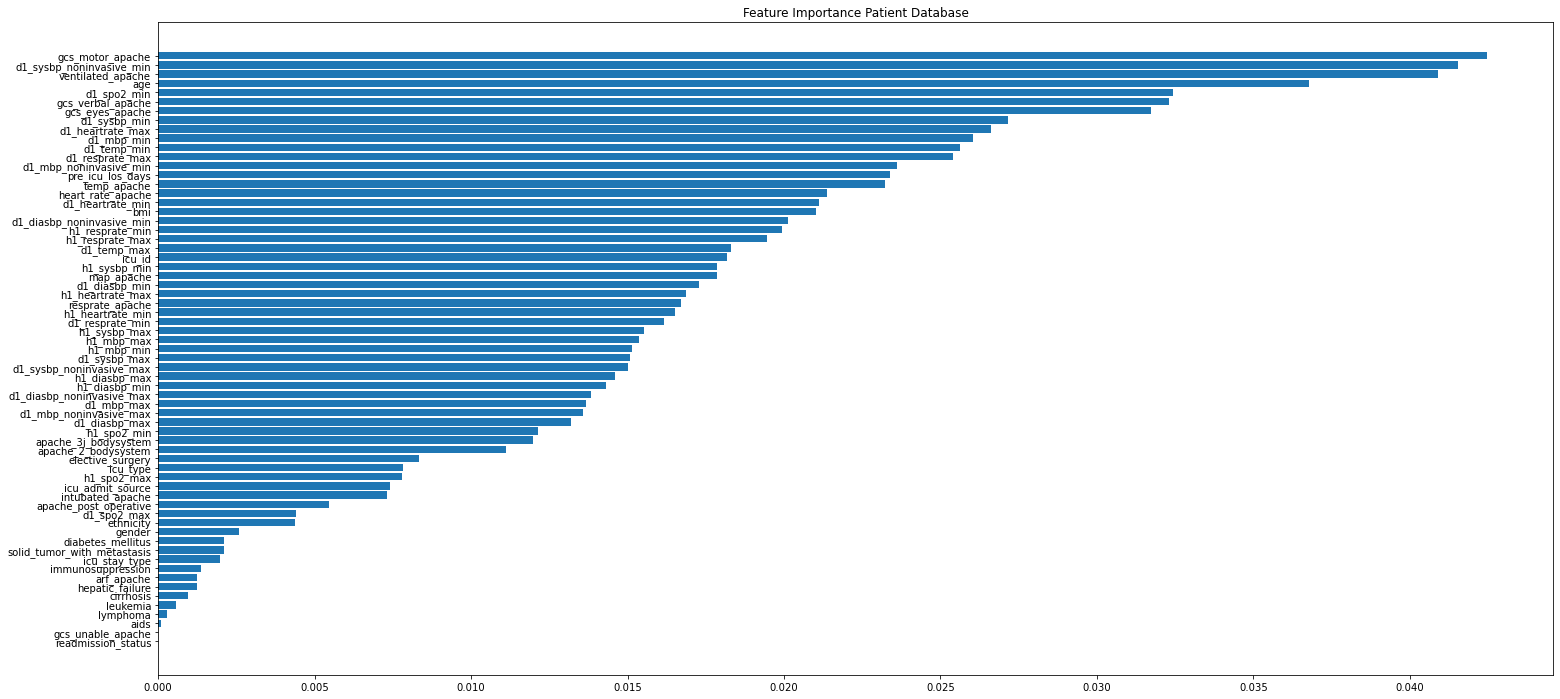

In [69]:
# Plot Features 

feature_importance = brfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fit = plt.figure(figsize=(25,12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance Patient Database')

### APACHE Covariates

In [70]:
file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Machine_Learning/Resources/APACHE_covariates_patient.csv")
df_vitals_all = pd.read_csv(file_path)
df_vitals_all.head()

,patient_id,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,hospital_death
0,25312,0,0,3,6,0,4,118,0,40,36.0,39.3,0,0
1,59342,0,0,1,3,0,1,120,0,46,33.0,35.1,1,0
2,50777,0,0,3,6,0,5,102,0,68,37.0,36.7,0,0
3,46918,1,0,4,6,0,5,114,1,60,4.0,34.8,1,0
4,74489,0,0,4,6,0,5,113,0,130,35.0,36.6,0,0


In [71]:
# Drop patient_id 


df_vitals_all=df_vitals_all.drop(columns=['patient_id'])

In [72]:
# Create our features

X = df_vitals_all.drop('hospital_death', axis=1)


X.head()

,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache
0,0,0,3,6,0,4,118,0,40,36.0,39.3,0
1,0,0,1,3,0,1,120,0,46,33.0,35.1,1
2,0,0,3,6,0,5,102,0,68,37.0,36.7,0
3,1,0,4,6,0,5,114,1,60,4.0,34.8,1
4,0,0,4,6,0,5,113,0,130,35.0,36.6,0


In [73]:
X.describe


<bound method NDFrame.describe of        apache_post_operative  arf_apache  gcs_eyes_apache  gcs_motor_apache  \
0                          0           0                3                 6   
1                          0           0                1                 3   
2                          0           0                3                 6   
3                          1           0                4                 6   
4                          0           0                4                 6   
...                      ...         ...              ...               ...   
73257                      1           0                4                 6   
73258                      0           0                4                 6   
73259                      0           0                4                 6   
73260                      0           0                4                 6   
73261                      1           0                4                 6   

       gcs_unable

In [74]:
#Create our target 

y = df_vitals_all['hospital_death']

y.value_counts()

0    67400
1     5862
Name: hospital_death, dtype: int64

In [75]:
# Split data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [76]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50550, 1: 4396})
Counter({0: 16850, 1: 1466})


In [77]:
# Instantiate RBC

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit

brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [78]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
RandomForest_accuracy_APACHE_covariates = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy_APACHE_covariates

0.7438645297363382

In [79]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,12402,4448
Actual Death,364,1102


In [80]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.74      0.75      0.84      0.74      0.55     16850
          1       0.20      0.75      0.74      0.31      0.74      0.55      1466

avg / total       0.91      0.74      0.75      0.80      0.74      0.55     18316



In [81]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

map_apache: (0.19319224605656593)
heart_rate_apache: (0.1876816636955183)
resprate_apache: (0.1592201197990838)
temp_apache: (0.155018229971661)
ventilated_apache: (0.07549233821282375)
gcs_verbal_apache: (0.06763486600549444)
gcs_eyes_apache: (0.05173388818394178)
gcs_motor_apache: (0.05102229669481661)
apache_post_operative: (0.030671297025877692)
intubated_apache: (0.019393473571807273)
arf_apache: (0.008939580782409477)
gcs_unable_apache: (0.0)


Text(0.5, 1.0, 'Feature Importance APACHE Covariates')

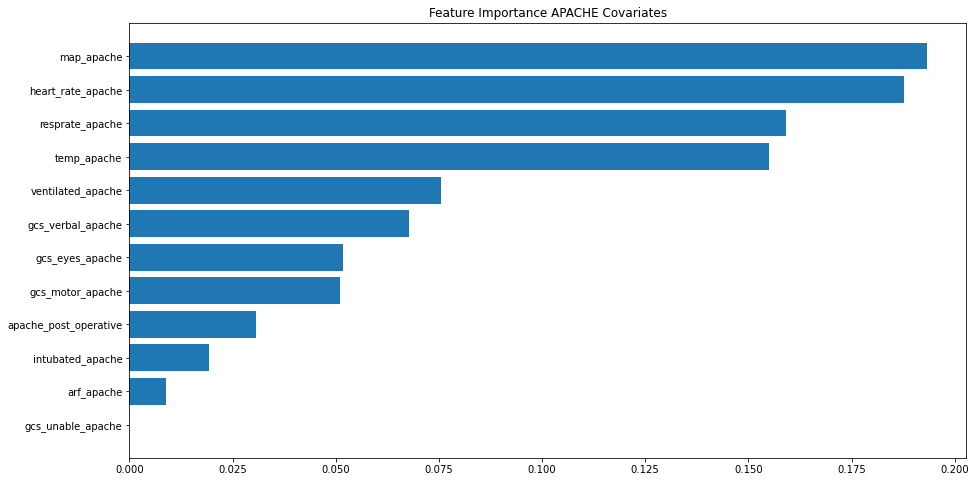

In [83]:
# Plot Features 

feature_importance = brfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fit = plt.figure(figsize=(15,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance APACHE Covariates')

### APACHE Comorbidity

In [84]:
file_path = Path("C:/Users/emili/Class/Patient_Survival_Prediction/Machine_Learning/Resources/APACHE_comorbidities_patient.csv")
df_vitals_all = pd.read_csv(file_path)
df_vitals_all.head()

,patient_id,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,25312,0,0,1,0,0,0,0,0,9,0,0
1,59342,0,0,1,0,0,0,0,0,8,6,0
2,50777,0,0,0,0,0,0,0,0,5,3,0
3,46918,0,0,0,0,0,0,0,0,0,0,0
4,74489,0,0,1,0,0,0,0,0,7,4,0


In [85]:
# Drop patient_id 


df_vitals_all=df_vitals_all.drop(columns=['patient_id'])

In [86]:
# Create our features

X = df_vitals_all.drop('hospital_death', axis=1)


X.head()

,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,0,1,0,0,0,0,0,9,0
1,0,0,1,0,0,0,0,0,8,6
2,0,0,0,0,0,0,0,0,5,3
3,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,7,4


In [87]:
X.describe

<bound method NDFrame.describe of        aids  cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
0         0          0                  1                0                  0   
1         0          0                  1                0                  0   
2         0          0                  0                0                  0   
3         0          0                  0                0                  0   
4         0          0                  1                0                  0   
...     ...        ...                ...              ...                ...   
73257     0          0                  0                0                  0   
73258     0          0                  0                0                  0   
73259     0          0                  1                0                  0   
73260     0          0                  0                0                  0   
73261     0          0                  0                0                 

In [88]:
#Create our target 

y = df_vitals_all['hospital_death']

y.value_counts()

0    67400
1     5862
Name: hospital_death, dtype: int64

In [89]:
# Split data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [90]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 50550, 1: 4396})
Counter({0: 16850, 1: 1466})


In [91]:
# Instantiate RBC

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit

brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [92]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
RandomForest_accuracy_APACHE_comorbidities = balanced_accuracy_score(y_test, y_pred)

RandomForest_accuracy_APACHE_comorbidities

0.5944092607511102

In [93]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Survival", "Actual Death"], columns=["Predicted Survival", "Predicted Death"])

cm_df

,Predicted Survival,Predicted Death
Actual Survival,11779,5071
Actual Death,748,718


In [94]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.70      0.49      0.80      0.59      0.35     16850
          1       0.12      0.49      0.70      0.20      0.59      0.34      1466

avg / total       0.87      0.68      0.51      0.75      0.59      0.35     18316



In [95]:
# List the features sorted in descending order by feature importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

apache_3j_bodysystem: (0.40676039547327947)
apache_2_bodysystem: (0.2970852418626419)
solid_tumor_with_metastasis: (0.058331873438163505)
diabetes_mellitus: (0.05313531904176189)
immunosuppression: (0.04787069757616029)
hepatic_failure: (0.0420906000288924)
cirrhosis: (0.03915196457000196)
leukemia: (0.029427874674045368)
lymphoma: (0.018838582973464597)
aids: (0.007307450361588646)


Text(0.5, 1.0, 'Feature Importance APACHE Comorbidities')

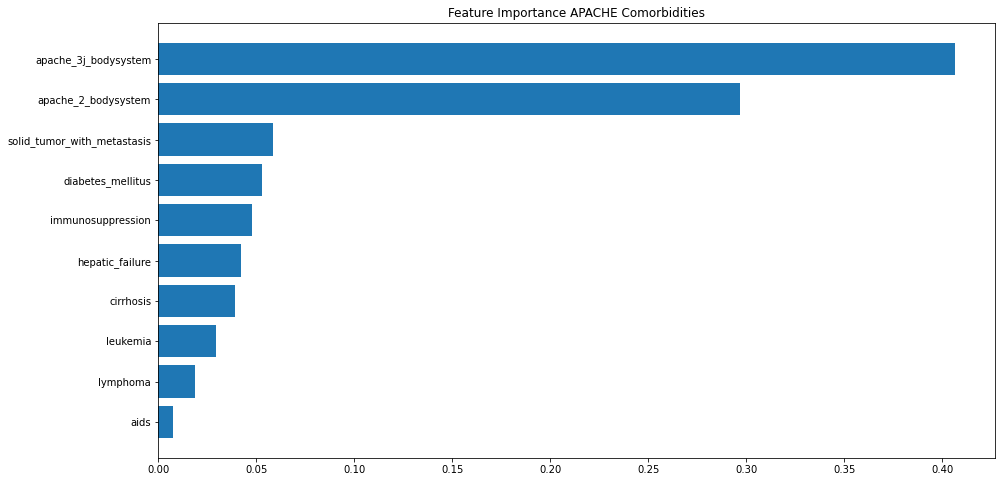

In [96]:
# Plot Features 

feature_importance = brfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fit = plt.figure(figsize=(15,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance APACHE Comorbidities')

## Accuracy Score Reports

In [97]:
# Report the accuracy scores of both models


Accuracy=[(RandomForest_accuracy_vitals_h1*100),(RandomForest_accuracy_vitals_d1*100),(RandomForest_accuracy_vitals_all*100),(RandomForest_accuracy_demographics*100),(RandomForest_accuracy_database*100),(RandomForest_accuracy_APACHE_covariates*100),(RandomForest_accuracy_APACHE_comorbidities*100)]

  
df = {'Algorithm': ['RandomForest_accuracy_vitals_h1','RandomForest_accuracy_vitals_d1','RandomForest_accuracy_vitals_all','RandomForest_accuracy_demographics','RandomForest_accuracy_database','RandomForest_accuracy_APACHE_covariates','RandomForest_accuracy_APACHE_comorbidities'], \
      'Acuuracy_Score':Accuracy}


Accuracy_Scores = pd.DataFrame(data=df, columns=['Algorithm','Acuuracy_Score'], index=None)

Accuracy_Scores

,Algorithm,Acuuracy_Score
0,RandomForest_accuracy_vitals_h1,66.105785
1,RandomForest_accuracy_vitals_d1,73.316001
2,RandomForest_accuracy_vitals_all,73.456824
3,RandomForest_accuracy_demographics,63.101024
4,RandomForest_accuracy_database,79.484311
5,RandomForest_accuracy_APACHE_covariates,74.386453
6,RandomForest_accuracy_APACHE_comorbidities,59.440926
